# Исследование тарифных планов  компании сотовой связи

Заказчик этого исследования — коммерческий отдел компании "Мегалайн". Для корректировки рекламного бюджета требуется предварительный анализ двух предлагаемых клиентам тарифных плана: "smart" и "ultra". 

   **Тариф "smart"**
    

        Ежемесячная плата: 550 рублей
        Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
        Стоимость услуг сверх тарифного пакета:
            минута разговора: 3 рубля
            сообщение: 3 рубля
            1 Гб интернет-трафика: 200 рублей

   **Тариф "ultra"**

        Ежемесячная плата: 1950 рублей
        Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
        Стоимость услуг сверх тарифного пакета:
            минута разговора: 1 рубль
            сообщение: 1 рубль
            1 Гб интернет-трафика: 150 рублей 

<font color='green'>Цель</font>

Основная цель - проанализировать поведение клиентов и сделать вывод о том, какой тариф для компании лучше.

<font color='green'>Задачи</font>

- подготовить данные
- проанализировать данные
- проверить следующие гипотезы:

  1) средняя выручка пользователей тарифов "ultra" и "smart" различаются;  
  2) средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

<font color='green'>Файлы</font>


- `calls.csv` - файл с данными для исследования.

- `internet.csv` - файл с данными для исследования.

- `messages.csv` - файл с данными для исследования.

- `tariffs.csv` - файл с данными для исследования.

- `users.csv` - файл с данными для исследования.


<font color='green'>Столбцы</font>


users.csv (информация о пользователях):

*    `user_id` — уникальный идентификатор пользователя
*    `first_name` — имя пользователя
*    `last_name` — фамилия пользователя
*    `age` — возраст пользователя (годы)
*    `reg_date` — дата подключения тарифа (день, месяц, год)
*    `churn_date` — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
*    `city` — город проживания пользователя
*    `tarif` — название тарифного плана

calls.csv (информация о звонках):

*    `id` — уникальный номер звонка
*    `call_date` — дата звонка
*    `duration` — длительность звонка в минутах
*    `user_id` — идентификатор пользователя, сделавшего звонок

messages.csv (информация о сообщениях):

*    `id` — уникальный номер сообщения
*    `message_date` — дата сообщения
*    `user_id` — идентификатор пользователя, отправившего сообщение

internet.csv (информация об интернет-сессиях):

*    `id` — уникальный номер сессии
*    `mb_used` — объём потраченного за сессию интернет-трафика (в мегабайтах)
*    `session_date` — дата интернет-сессии
*    `user_id` — идентификатор пользователя

tariffs.csv (информация о тарифах):

*    `tariff_name` — название тарифа
*    `rub_monthly_fee` — ежемесячная абонентская плата в рублях
*    `minutes_included` — количество минут разговора в месяц, включённых в абонентскую плату
*    `messages_included` — количество сообщений в месяц, включённых в абонентскую плату
*    `mb_per_month_included` — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
*    `rub_per_minute` — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
*    `rub_per_message` — стоимость отправки сообщения сверх тарифного пакета
*    `rub_per_gb` — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

<font color='green'>Содержание</font>

<h1><span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Шаг-1.-Изучение-и-подготовка-данных" data-toc-modified-id="Шаг-1.-Изучение-и-подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Шаг 1. Изучение и подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Файл-tariffs.csv" data-toc-modified-id="Файл-tariffs.csv-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Файл tariffs.csv</a></span></li><li><span><a href="#Файл-internet.csv" data-toc-modified-id="Файл-internet.csv-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Файл internet.csv</a></span></li><li><span><a href="#Файл-messages.csv" data-toc-modified-id="Файл-messages.csv-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Файл messages.csv</a></span></li><li><span><a href="#Файл-calls.csv" data-toc-modified-id="Файл-calls.csv-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Файл calls.csv</a></span></li><li><span><a href="#Файл-users.csv" data-toc-modified-id="Файл-users.csv-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Файл users.csv</a></span></li><li><span><a href="#Сводная-таблица-данных" data-toc-modified-id="Сводная-таблица-данных-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Сводная таблица данных</a></span></li></ul></li><li><span><a href="#Шаг-2.-Анализ-данных" data-toc-modified-id="Шаг-2.-Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Шаг 2. Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Выручка-с-каждого-пользователя" data-toc-modified-id="Выручка-с-каждого-пользователя-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Выручка с каждого пользователя</a></span></li><li><span><a href="#Поведение-клиентов" data-toc-modified-id="Поведение-клиентов-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Поведение клиентов</a></span><ul class="toc-item"><li><span><a href="#Интернет" data-toc-modified-id="Интернет-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Интернет</a></span></li><li><span><a href="#Сообщения" data-toc-modified-id="Сообщения-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>Сообщения</a></span></li><li><span><a href="#Звонки" data-toc-modified-id="Звонки-2.2.3"><span class="toc-item-num">2.2.3&nbsp;&nbsp;</span>Звонки</a></span></li></ul></li></ul></li><li><span><a href="#Шаг-3.-Проверка-гипотез" data-toc-modified-id="Шаг-3.-Проверка-гипотез-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Шаг 3. Проверка гипотез</a></span><ul class="toc-item"><li><span><a href="#Гипотеза-1:-различие-средней-выручки-пользователей-тарифов-«ultra»-и-«smart»" data-toc-modified-id="Гипотеза-1:-различие-средней-выручки-пользователей-тарифов-«ultra»-и-«smart»-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Гипотеза 1: различие средней выручки пользователей тарифов «ultra» и «smart»</a></span></li><li><span><a href="#Гипотеза-2:-различие-средней-выручки-пользователей-Москвы-и-других-регионов." data-toc-modified-id="Гипотеза-2:-различие-средней-выручки-пользователей-Москвы-и-других-регионов.-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Гипотеза 2: различие средней выручки пользователей Москвы и других регионов.</a></span></li></ul></li><li><span><a href="#Шаг-4.-Общий-вывод" data-toc-modified-id="Шаг-4.-Общий-вывод-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Шаг 4. Общий вывод</a></span></li></ul></div>

### Шаг 1. Изучение и подготовка данных

In [1]:
import pandas as pd
import numpy as np
from scipy import stats as st
import scipy.stats as sps

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

In [2]:
users = pd.read_csv('/ML/datasets/users.csv')
calls = pd.read_csv('/ML/datasets/calls.csv')
messages = pd.read_csv('/ML/datasets/messages.csv')
internet = pd.read_csv('/ML/datasets/internet.csv',index_col=0)
tariffs = pd.read_csv('/ML/datasets/tariffs.csv')

#### Файл tariffs.csv

In [3]:
tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [4]:
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


В файле `tariffs.csv` представлена информация по двум рассматриваемым тарифам. 

Приведем данные в столбе `mb_per_month_included` к gb, переименуем его.

In [5]:
tariffs['mb_per_month_included'] = tariffs['mb_per_month_included'] / 1024
tariffs = tariffs.rename(columns={'mb_per_month_included':'gb_per_month_included'}) 
tariffs.head()

,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15.0,500,550,200,3,3,smart
1,1000,30.0,3000,1950,150,1,1,ultra


#### Файл internet.csv

In [6]:
internet.head(3)

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000


In [7]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            149396 non-null  object 
 1   mb_used       149396 non-null  float64
 2   session_date  149396 non-null  object 
 3   user_id       149396 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 5.7+ MB


Пропущенных значений нет. Проверим наличие явных дубликатов. 

In [8]:
internet.duplicated().sum() 

0

Изменим тип данных в столбце `session_date` и добавим новые столбцы с данными о месяце и годе сессии. 

In [9]:
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')
internet['month'] = pd.DatetimeIndex(internet['session_date']).month
internet['year'] = pd.DatetimeIndex(internet['session_date']).year
internet.head()

,id,mb_used,session_date,user_id,month,year
0,1000_0,112.95,2018-11-25,1000,11,2018
1,1000_1,1052.81,2018-09-07,1000,9,2018
2,1000_2,1197.26,2018-06-25,1000,6,2018
3,1000_3,550.27,2018-08-22,1000,8,2018
4,1000_4,302.56,2018-09-24,1000,9,2018


Посмотрим за какой период предоставлены данные.

In [10]:
internet['year'].sort_values().unique()

array([2018], dtype=int64)

Посмотрим на распределение по объёму трафика.

C:\Users\white\AppData\Local\Temp\ipykernel_12700\425032646.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(internet['mb_used'], bins=50, color='yellowgreen', kde=False, hist_kws={"alpha": 1})


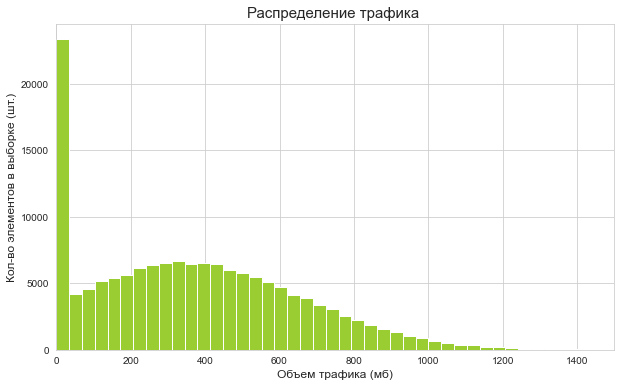

In [11]:
sns.set_style("whitegrid") 
plt.figure(figsize=(10, 6))
sns.distplot(internet['mb_used'], bins=50, color='yellowgreen', kde=False, hist_kws={"alpha": 1})
plt.xlabel('Объем трафика (мб)', fontsize=12)
plt.ylabel('Кол-во элементов в выборке (шт.)', fontsize=12)
plt.title('Распределение трафика ', fontsize=15)
plt.xlim(0, 1500)
plt.show()

In [12]:
print('ТОП 5:')
internet['mb_used'].value_counts().head()

ТОП 5:


0.00      19598
335.91        9
447.30        9
197.56        9
199.11        8
Name: mb_used, dtype: int64

В 19598 случаях объем трафика равен 0. Т.к. эти данные никак не повлияют на выручку, удалим их. 

In [13]:
internet['mb_used'] = internet['mb_used'].replace(0, np.NaN)
internet = internet.dropna()

Итоговое распределение выглядит так:

C:\Users\white\AppData\Local\Temp\ipykernel_12700\4238334570.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(internet['mb_used'], bins=50, color='yellowgreen', kde=False, hist_kws={"alpha": 1})


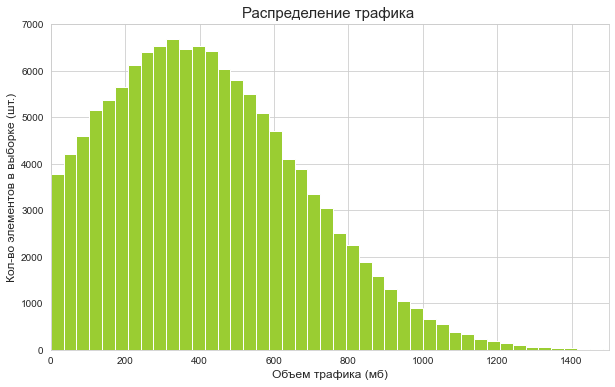

In [14]:
plt.figure(figsize=(10, 6))
sns.distplot(internet['mb_used'], bins=50, color='yellowgreen', kde=False, hist_kws={"alpha": 1})
plt.xlabel('Объем трафика (мб)', fontsize=12)
plt.ylabel('Кол-во элементов в выборке (шт.)', fontsize=12)
plt.title('Распределение трафика ', fontsize=15)
plt.xlim(0, 1500)
plt.show()

#### Файл messages.csv

In [15]:
messages.head(3)

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000


In [16]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


Пропущенных значений нет. Проверим наличие явных дубликатов. 

In [17]:
messages.duplicated().sum() 

0

Изменим тип данных в столбце `message_date` и добавим новые столбцы с данными о месяце отправки сообщения и годе. 

In [18]:
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')
messages['month'] = pd.DatetimeIndex(messages['message_date']).month
messages['year'] = pd.DatetimeIndex(messages['message_date']).year
messages.head()

,id,message_date,user_id,month,year
0,1000_0,2018-06-27,1000,6,2018
1,1000_1,2018-10-08,1000,10,2018
2,1000_2,2018-08-04,1000,8,2018
3,1000_3,2018-06-16,1000,6,2018
4,1000_4,2018-12-05,1000,12,2018


Посмотрим за какой период предоставлены данные.

In [19]:
messages['year'].sort_values().unique()

array([2018], dtype=int64)

#### Файл calls.csv

In [20]:
calls.head(3)

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000


In [21]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


Пропущенных значений нет. Проверим наличие явных дубликатов. 

In [22]:
calls.duplicated().sum() 

0

Изменим тип данных в столбце `call_date` и добавим новые столбцы с данными о месяце и годе. 

Учитывая, что "Мегалайн" округляет секунды до минуты, округлим данные столбца `duration` вверх до целого.

In [23]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')
calls['month'] = pd.DatetimeIndex(calls['call_date']).month
calls['year'] = pd.DatetimeIndex(calls['call_date']).year
calls['duration'] = calls['duration'].apply(np.ceil).astype(int) #округление вверх до целого
calls.head()

,id,call_date,duration,user_id,month,year
0,1000_0,2018-07-25,0,1000,7,2018
1,1000_1,2018-08-17,0,1000,8,2018
2,1000_2,2018-06-11,3,1000,6,2018
3,1000_3,2018-09-21,14,1000,9,2018
4,1000_4,2018-12-15,6,1000,12,2018


Посмотрим за какой период предоставлены данные.

In [24]:
calls['year'].sort_values().unique()

array([2018], dtype=int64)

Посмотрим на данные по продолжительности вызовов и на распределение звонков по месяцам. 

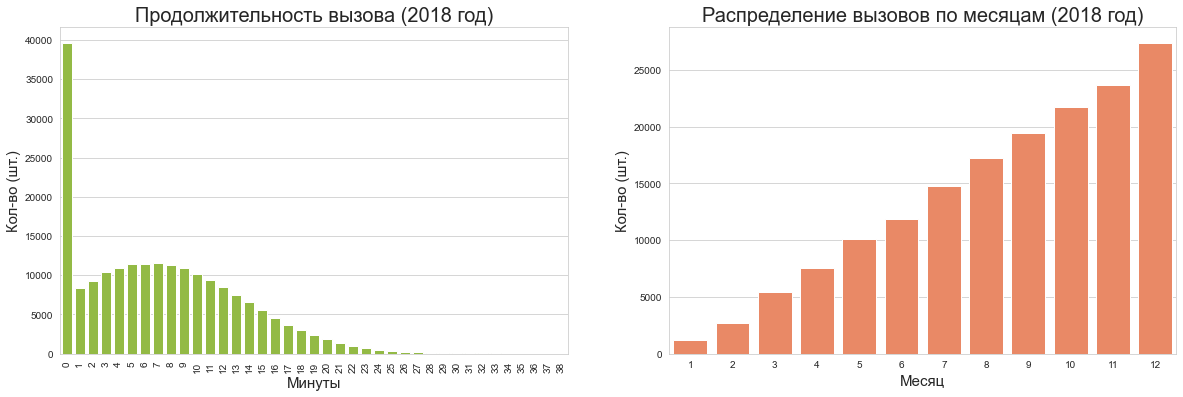

In [25]:
plt.figure(figsize=(20, 6))

plt.subplot(121)
sns.countplot(x='duration', data=calls, color='yellowgreen')
plt.xticks(rotation=90)
plt.ylabel('Кол-во (шт.)', fontsize=15)
plt.xlabel('Минуты', fontsize=15)
plt.title('Продолжительность вызова (2018 год)', fontsize=20)


plt.subplot(122)
sns.countplot(x='month', data=calls.loc[calls['duration'] != 0], color='coral')
plt.ylabel('Кол-во (шт.)', fontsize=15)
plt.xlabel('Месяц', fontsize=15)
plt.title('Распределение вызовов по месяцам (2018 год)', fontsize=20)
plt.show()

In [26]:
print('ТОП 5:')
calls['duration'].value_counts().head()

ТОП 5:


0    39613
7    11510
6    11457
5    11411
8    11272
Name: duration, dtype: int64

Кол-во звонков возрастает практически линейно месяц к месяцу, что закономерно т.к. выборка состоит из  пользователей, присоединившихся к тарифу в 2018 году, а их кол-во растет с каждым месяцем. 

Наблюдается значительная доля вызовов с нулевой длительностью - 39613 случаев, что согласно вводным данным соответствует пропущенным звонкам. Т.к. эти данные никак не повлияют на выручку, удалим их. 

In [27]:
calls = calls.drop(calls[calls['duration'] == 0].index)

Итоговое распределение длительности вызовов выглядит так:

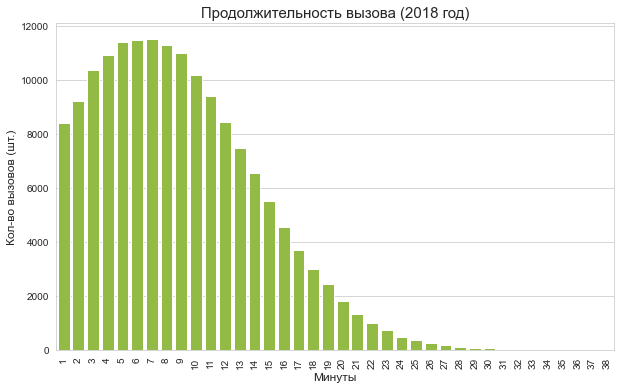

In [28]:
plt.figure(figsize=(10, 6))
sns.countplot(x='duration', data=calls, color='yellowgreen')
plt.xticks(rotation=90)
plt.ylabel('Кол-во вызовов (шт.)', fontsize=12)
plt.xlabel('Минуты', fontsize=12)
plt.title('Продолжительность вызова (2018 год)', fontsize=15)
plt.show()

#### Файл users.csv

In [29]:
users.head(3)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart


In [30]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


Изменим тип данных в столбцах `churn_date` и `reg_date`, добавим новые столбцы с данными о месяце и годе подключения/отключения тарифа.

In [31]:
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d')
users['reg_date_month'] = pd.DatetimeIndex(users['reg_date']).month
users['reg_date_year'] = pd.DatetimeIndex(users['reg_date']).year
users['churn_date_month'] = pd.DatetimeIndex(users['churn_date']).month
users['churn_date_year'] = pd.DatetimeIndex(users['churn_date']).year
users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,reg_date_month,reg_date_year,churn_date_month,churn_date_year
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,2018,NaN,NaN
1,1001,41,NaT,Москва,Иван,Ежов,2018-11-01,smart,11,2018,NaN,NaN
2,1002,59,NaT,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,6,2018,NaN,NaN
3,1003,23,NaT,Москва,Белла,Белякова,2018-08-17,ultra,8,2018,NaN,NaN
4,1004,68,NaT,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra,5,2018,NaN,NaN


В столбце `churn_date` присутствуют пропущенные значения. Согласно вводной информации, пропущенные значения в этом столбце соответствуют ситуации, когда тариф ещё действовал на момент выгрузки данных. Оставим пропуски без изменения. Проверим наличие явных дубликатов. 

In [32]:
users.duplicated().sum() 

0

Посмотрим на сами данные.

In [33]:
users['reg_date_year'].value_counts()

2018    500
Name: reg_date_year, dtype: int64

In [34]:
users['churn_date_year'].value_counts()

2018.0    38
Name: churn_date_year, dtype: int64

Данные о датах подключения/отключения тарифа представлены за 2018 год.

In [35]:
users['age'].sort_values().unique()

array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75], dtype=int64)

Минимальный возраст клиентов в выборке 18 лет, максимальный - 75. 

In [36]:
users['city'].value_counts()

Москва             99
Санкт-Петербург    39
Новосибирск        16
Омск               14
Казань             14
                   ..
Архангельск         1
Иваново             1
Нижневартовск       1
Химки               1
Подольск            1
Name: city, Length: 76, dtype: int64

Самые распространенные города - Москва и Санкт-Петербург.

Посмотрим на распределение пользователей по тарифам.  

In [37]:
users['tariff'].value_counts()

smart    351
ultra    149
Name: tariff, dtype: int64

Проверим наличие дубликатов среди клиентов. Их наличие скажет о переходе клиента с тарифа на тариф (с условием, что выборка репрезентативна). 

In [38]:
users[['age', 'first_name', 'last_name']].duplicated().sum() 

0

Посмотрим на распределение дат регистрации по тарифам.

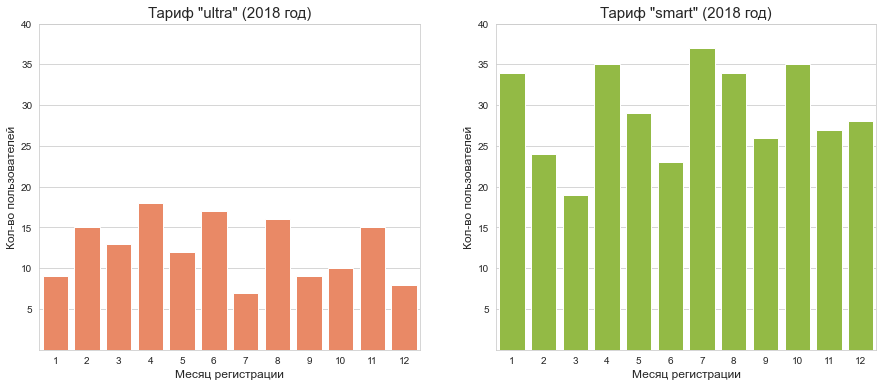

In [39]:
plt.figure(figsize=(15, 6))

plt.subplot(121)
sns.countplot(x='reg_date_month', data=users.loc[users['tariff'] == 'ultra'], color='coral')
plt.yticks([5, 10, 15, 20, 25, 30, 35, 40])
plt.ylabel('Кол-во пользователей', fontsize=12)
plt.xlabel('Месяц регистрации', fontsize=12)
plt.title('Тариф "ultra" (2018 год)', fontsize=15)


plt.subplot(122)
sns.countplot(x='reg_date_month', data=users.loc[users['tariff'] == 'smart'], color='yellowgreen')
plt.yticks([5, 10, 15, 20, 25, 30, 35, 40])
plt.ylabel('Кол-во пользователей', fontsize=12)
plt.xlabel('Месяц регистрации', fontsize=12)
plt.title('Тариф "smart" (2018 год)', fontsize=15)
plt.show()

Для тарифа `"smart"` наблюдаются пики с периодичностью 3 месяца. Возможно, это связано с рекламными акциями. 

Посмотрим теперь на распределение дат окончания пользования тарифом.

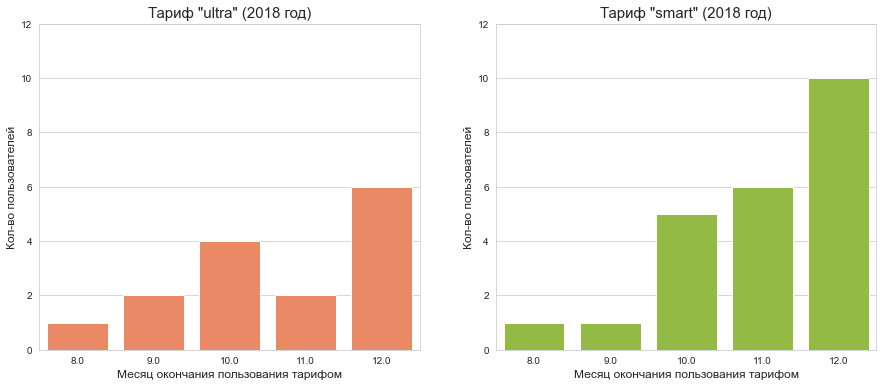

In [40]:
plt.figure(figsize=(15, 6))

plt.subplot(121)
sns.countplot(x='churn_date_month', data=users.loc[users['tariff'] == 'ultra'], color='coral')
plt.yticks([0, 2, 4, 6, 8, 10, 12])
plt.ylabel('Кол-во пользователей', fontsize=12)
plt.xlabel('Месяц окончания пользования тарифом', fontsize=12)
plt.title('Тариф "ultra" (2018 год)', fontsize=15)


plt.subplot(122)
sns.countplot(x='churn_date_month', data=users.loc[users['tariff'] == 'smart'], color='yellowgreen')
plt.yticks([0, 2, 4, 6, 8, 10, 12])
plt.ylabel('Кол-во пользователей', fontsize=12)
plt.xlabel('Месяц окончания пользования тарифом', fontsize=12)
plt.title('Тариф "smart" (2018 год)', fontsize=15)
plt.show()

Посмотрим на доли пользователей, отказавшихся от использования тарифов. 

In [41]:
print(f'Доля пользователей, отказавшихся от использования тарифа "smart": {(users.loc[users["tariff"] == "smart"]["churn_date"].count() / users.loc[users["tariff"] == "smart"]["reg_date"].count()):.2%}')
print(f'Доля пользователей, отказавшихся от использования тарифа "ultra": {(users.loc[users["tariff"] == "ultra"]["churn_date"].count() / users.loc[users["tariff"] == "ultra"]["reg_date"].count()):.2%}')

Доля пользователей, отказавшихся от использования тарифа "smart": 6.55%
Доля пользователей, отказавшихся от использования тарифа "ultra": 10.07%


Данные о дате прекращения пользованием тарифом представлены за август-декабрь 2018, что может быть связано с тем, что:

    1) в выборку попали только те пользователи, что подключили тариф в 2018 году;
    2) тарифы запущены в 2018 году;
    3) наличие авансового платежа при подключении тарифа/бесплатного периода.
    
Восходящий тренд по количеству клиентов отказавшихся от тарифа связан с ростом кол-ва самих клиентов. 

#### Сводная таблица данных

Объединим подготовленные данные в общую таблицу.

In [42]:
calls_group = calls.groupby(['user_id', 'month']).agg(calls_count = ('duration', 'count'),\
                                                      minut_used = ('duration', 'sum'))
messages_group = messages.groupby(['user_id', 'month']).agg(messages_count = ('id', 'count'))
internet_group = internet.groupby(['user_id', 'month']).agg(gb_used = ('mb_used', 'sum'))

df = pd.concat([calls_group, messages_group, internet_group], axis=1).reset_index()

Т.к. "Мегалайн" всегда округляет мегабайты до гигабайта, переведем данные в гигабайты и округлим вверх до целого.

In [43]:
df['gb_used'] = (df['gb_used']/1024).apply(np.ceil)

In [44]:
df.head()

,user_id,month,calls_count,minut_used,messages_count,gb_used
0,1000,5,17.0,159.0,22.0,3.0
1,1000,6,28.0,172.0,60.0,23.0
2,1000,7,41.0,340.0,75.0,14.0
3,1000,8,42.0,408.0,81.0,14.0
4,1000,9,46.0,466.0,57.0,15.0


Добавим новые столбцы.

In [45]:
df = df.merge(users[['user_id', 'tariff', 'city', 'age', 'churn_date_month', 'reg_date_month']], on='user_id', how='left')
df = df.rename(columns={'tariff':'tariff_name'})
df = df.merge(tariffs, on='tariff_name', how='left')
df.sample(n=10, random_state=3).T

,2587,3143,2277,1092,471,347,2644,838,87,562
user_id,1409,1495,1366,1174,1074,1055,1417,1134,1011,1089
month,5,11,6,11,12,7,12,11,12,8
calls_count,83.0,112.0,18.0,63.0,64.0,43.0,41.0,60.0,44.0,50.0
minut_used,734.0,954.0,166.0,519.0,580.0,445.0,368.0,596.0,361.0,466.0
messages_count,42.0,79.0,19.0,57.0,3.0,36.0,92.0,50.0,6.0,126.0
gb_used,17.0,39.0,5.0,15.0,22.0,19.0,13.0,16.0,23.0,17.0
tariff_name,smart,ultra,smart,smart,smart,smart,smart,smart,smart,ultra
city,Набережные Челны,Иркутск,Санкт-Петербург,Санкт-Петербург,Якутск,Казань,Тольятти,Красноярск,Самара,Иркутск
age,42,65,43,29,68,39,34,65,44,19
churn_date_month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Проверим итоговую таблицу на наличие пропусков.

In [46]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                3214 non-null   int64  
 1   month                  3214 non-null   int64  
 2   calls_count            3168 non-null   float64
 3   minut_used             3168 non-null   float64
 4   messages_count         2717 non-null   float64
 5   gb_used                3201 non-null   float64
 6   tariff_name            3214 non-null   object 
 7   city                   3214 non-null   object 
 8   age                    3214 non-null   int64  
 9   churn_date_month       187 non-null    float64
 10  reg_date_month         3214 non-null   int64  
 11  messages_included      3214 non-null   int64  
 12  gb_per_month_included  3214 non-null   float64
 13  minutes_included       3214 non-null   int64  
 14  rub_monthly_fee        3214 non-null   int64  
 15  rub_

Пропуски в столбцах `gb_used`, `calls_count`, `minut_used`, `messages_count` связаны с тем, что пользователи могли не пользоваться одной из предложенных в тарифе услуг. Заменим пропуски нулями. С помощью метода `astype` изменим тип данных.

In [47]:
df.loc[:, ['gb_used', 'calls_count', 'minut_used', 'messages_count']] = \
    df.loc[:, ['gb_used', 'calls_count', 'minut_used', 'messages_count']].fillna(0) 
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                3214 non-null   int64  
 1   month                  3214 non-null   int64  
 2   calls_count            3214 non-null   float64
 3   minut_used             3214 non-null   float64
 4   messages_count         3214 non-null   float64
 5   gb_used                3214 non-null   float64
 6   tariff_name            3214 non-null   object 
 7   city                   3214 non-null   object 
 8   age                    3214 non-null   int64  
 9   churn_date_month       187 non-null    float64
 10  reg_date_month         3214 non-null   int64  
 11  messages_included      3214 non-null   int64  
 12  gb_per_month_included  3214 non-null   float64
 13  minutes_included       3214 non-null   int64  
 14  rub_monthly_fee        3214 non-null   int64  
 15  rub_

In [48]:
df['user_id'] = df['user_id'].astype('int32')
df['month'] = df['month'].astype('int32')
df['gb_used'] = df['gb_used'].astype('int32')
df['calls_count'] = df['calls_count'].astype('int32')
df['minut_used'] = df['minut_used'].astype('int32')
df['messages_count'] = df['messages_count'].astype('int32')
df['age'] = df['age'].astype('int32')
df['reg_date_month'] = df['reg_date_month'].astype('int32')
df['messages_included'] = df['messages_included'].astype('int32')
df['gb_per_month_included'] = df['gb_per_month_included'].astype('int32')
df['minutes_included'] = df['minutes_included'].astype('int32')
df['rub_monthly_fee'] = df['rub_monthly_fee'].astype('int32')
df['rub_per_gb'] = df['rub_per_gb'].astype('int32')
df['rub_per_message'] = df['rub_per_message'].astype('int32')
df['rub_per_minute'] = df['rub_per_minute'].astype('int32')

In [49]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                3214 non-null   int32  
 1   month                  3214 non-null   int32  
 2   calls_count            3214 non-null   int32  
 3   minut_used             3214 non-null   int32  
 4   messages_count         3214 non-null   int32  
 5   gb_used                3214 non-null   int32  
 6   tariff_name            3214 non-null   object 
 7   city                   3214 non-null   object 
 8   age                    3214 non-null   int32  
 9   churn_date_month       187 non-null    float64
 10  reg_date_month         3214 non-null   int32  
 11  messages_included      3214 non-null   int32  
 12  gb_per_month_included  3214 non-null   int32  
 13  minutes_included       3214 non-null   int32  
 14  rub_monthly_fee        3214 non-null   int32  
 15  rub_

**Вывод**

Нарушений в стиле и явных дубликатов не выявлено. Пропущенные значения имеют естественный характер. Нулевые значения в столбцах `mb_used` и `duration` решено не учитывать. Необходимая информация объединена в файл `df.csv`.

Общая информация по данным:
 - данные представлены за 2018 год, в связи с чем количество пользователей и оказываемых им услуг растет по году почти линейно;
 - 70% клиентов в выборке пользуется тарифом `"smart"`, 30% клиентов в выборке пользуется тарифом `"ultra"`;
 - минимальный возраст клиентов в выборке 18 лет, максимальный - 75;
 - самые распространенные города - Москва и Санкт-Петербург: 19.8% и 7,8% соответственно;
 - данные о дате прекращения пользованием тарифом представлены за август-декабрь 2018, доля клиентов прекративших использовать тариф `"smart"` и `"ultra"` - 6,55% и 10,07% соответственно (к общему числу клиентов каждого тарифа).

### Шаг 2. Анализ данных

#### Выручка с каждого пользователя

Добавим новые столбцы для подсчета сверхлимита и выручки.

In [50]:
df['minutes_over'] = np.where((df['minut_used'] - df['minutes_included']) > 0, \
                              df['minut_used'] - df['minutes_included'], 0).astype('int32')  
df['gb_over'] = np.where((df['gb_used'] - df['gb_per_month_included']) > 0, \
                              df['gb_used'] - df['gb_per_month_included'], 0).astype('int32')
df['messages_over'] = np.where((df['messages_count'] - df['messages_included']) > 0, \
                              df['messages_count'] - df['messages_included'], 0).astype('int32')
df['over_tariff'] = df['minutes_over'] * df['rub_per_minute'] + df['gb_over'] * df['rub_per_gb'] \
                                       + df['messages_over'] * df['rub_per_message'].astype('int32')
df['over_category'] = np.where(df['over_tariff'] > 0, 1, 0) # присвоение категории: 1 - есть сверхлимит по одной из услуг, 0 - нет
df['revenue'] = df['over_tariff'] + df['rub_monthly_fee'].astype('int32')

df.sample(n=10, random_state=3).T

,2587,3143,2277,1092,471,347,2644,838,87,562
user_id,1409,1495,1366,1174,1074,1055,1417,1134,1011,1089
month,5,11,6,11,12,7,12,11,12,8
calls_count,83,112,18,63,64,43,41,60,44,50
minut_used,734,954,166,519,580,445,368,596,361,466
messages_count,42,79,19,57,3,36,92,50,6,126
gb_used,17,39,5,15,22,19,13,16,23,17
tariff_name,smart,ultra,smart,smart,smart,smart,smart,smart,smart,ultra
city,Набережные Челны,Иркутск,Санкт-Петербург,Санкт-Петербург,Якутск,Казань,Тольятти,Красноярск,Самара,Иркутск
age,42,65,43,29,68,39,34,65,44,19
churn_date_month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Посмотрим на годовую выручку по тарифам:

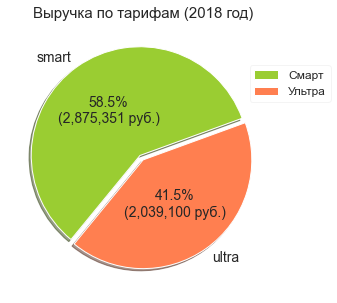

In [51]:
def func_pct(pct):
    value = float(pct/100.*df['revenue'].sum())
    return "{:.1f}%\n({:,.0f} руб.)".format(pct, value)

explode = (0.05, 0) 
axes = df.groupby('tariff_name')['revenue'].sum().plot(kind='pie', fontsize=14,
                                                    use_index=False, shadow=True, explode=explode,
                                                    title = 'Выручка по тарифам (2018 год)', pctdistance=0.5,
                                                    startangle=20, figsize=(20,5), colors=['yellowgreen', 'coral'],
                                                    autopct=lambda pct: func_pct(pct))
axes.title.set_size(15) 
axes.set_ylabel('')
axes.legend(['Смарт', 'Ультра'], bbox_to_anchor=(0.87,0.87), framealpha=0.2, prop={'size':12})
plt.show()

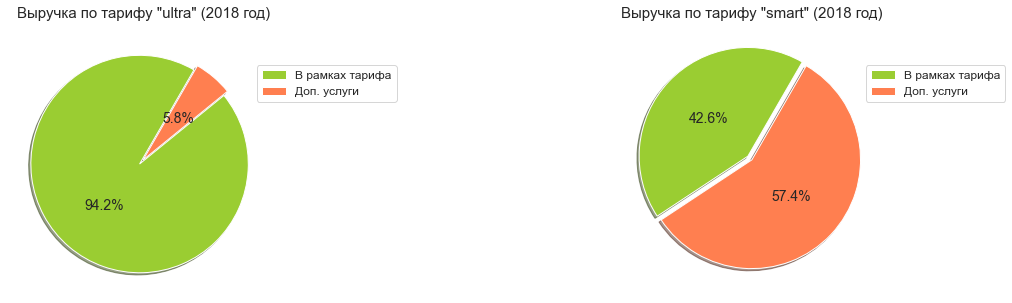

In [52]:
fig, axes = plt.subplots(1, 2, figsize=(20,10))

explode = (0.05, 0) 

over = df[df['tariff_name'] == 'smart']['over_tariff'].sum()
tariff = df[df['tariff_name'] == 'smart']['revenue'].sum() - over
df_filtered = pd.DataFrame([[1,over], [0,tariff]], columns=['category','руб.']).groupby('category')['руб.']
ax = df_filtered.sum().plot(kind='pie', fontsize=14, use_index=False, shadow=True, \
                      title='Выручка по тарифу "smart" (2018 год)', pctdistance=0.50, figsize=(20,5),
                      startangle=60, ax=axes[1], explode=explode, autopct='%1.1f%%', colors=['yellowgreen', 'coral'],\
                      labels=None)
ax.legend(['В рамках тарифа', 'Доп. услуги'], bbox_to_anchor=(0.897,0.87), prop={'size':12})
ax.set_ylabel('')
ax.title.set_size(15) 

over = df[df['tariff_name'] == 'ultra']['over_tariff'].sum()
tariff = df[df['tariff_name'] == 'ultra']['revenue'].sum() - over
df_filtered = pd.DataFrame([[1,over], [0,tariff]], columns=['category','руб.']).groupby('category')['руб.']
ax = df_filtered.sum().plot(kind='pie', fontsize=14, use_index=False, shadow=True, \
                      title='Выручка по тарифу "ultra" (2018 год)', pctdistance=0.50, figsize=(20,5),
                      startangle=60, ax=axes[0], explode=explode, autopct='%1.1f%%', colors=['yellowgreen','coral'], \
                      labels=None)
ax.legend(['В рамках тарифа', 'Доп. услуги'], bbox_to_anchor=(0.897,0.87), prop={'size':12})
ax.set_ylabel('')
ax.title.set_size(15) 

Клиенты, пользующиеся тарифом `"smart"`, в 57,4% случаев не укладываются в лимиты, для тарифа `"ultra"` этот показатель составляет 5,8%.

In [53]:
print('Выручка по тарифу "ultra"', df[df['tariff_name'] == 'ultra']['revenue'].sum(),'руб.')
print('в т.ч. сверхлимит:', df[df['tariff_name'] == 'ultra']['over_tariff'].sum(),'руб.')
print('среднее значение выручки:', '{:.2f}'.format(df.loc[(df['tariff_name'] == 'ultra') & (df['revenue'] > 0)]\
                                ['revenue'].mean()),'руб.')
print('среднее значение сверхлимитной выручки:', '{:.2f}'.format(df.loc[(df['tariff_name'] == 'ultra') \
                                & (df['over_tariff'] > 0)]['over_tariff'].mean()),'руб.')

Выручка по тарифу "ultra" 2039100 руб.
в т.ч. сверхлимит: 118350 руб.
среднее значение выручки: 2070.15 руб.
среднее значение сверхлимитной выручки: 883.21 руб.


In [54]:
print('Выручка по тарифу "smart"', df[df['tariff_name'] == 'smart']['revenue'].sum(),'руб.')
print('в т.ч. сверхлимит:', df[df['tariff_name'] == 'smart']['over_tariff'].sum(),'руб.')
print('среднее значение выручки:', '{:.2f}'.format(df.loc[(df['tariff_name'] == 'smart') & (df['revenue'] > 0)]\
                                 ['revenue'].mean()),'руб.')
print('среднее значение сверхлимитной выручки:', '{:.2f}'.format(df.loc[(df['tariff_name'] == 'smart')\
                                 & (df['over_tariff'] > 0)]['over_tariff'].mean()),'руб.')

Выручка по тарифу "smart" 2875351 руб.
в т.ч. сверхлимит: 1649401 руб.
среднее значение выручки: 1289.97 руб.
среднее значение сверхлимитной выручки: 992.42 руб.


Посмотрим на выручку по клиентам пользующихся тарифом и отказавшихся от него. 

In [55]:
sample_1 = df.loc[(df['churn_date_month'] > 0) & (df['tariff_name'] == 'smart')]['revenue']
sample_2 = df.loc[(df['churn_date_month'].isnull()) & (df['tariff_name'] == 'smart')]['revenue']
sample_3 = df.loc[(df['churn_date_month'] > 0) & (df['tariff_name'] == 'ultra')]['revenue']
sample_4 = df.loc[(df['churn_date_month'].isnull()) & (df['tariff_name'] == 'ultra')]['revenue']

print("Средняя выручка по пользователям отказавшихся от тарифа 'smart'", '{:.2f}'.format(sample_1.mean()),"руб.")
print("Средняя выручка по пользователям пользующихся тарифом 'smart'", '{:.2f}'.format(sample_2.mean()),"руб.")
print()
print("Средняя выручка по пользователям отказавшихся от тарифа 'ultra'", '{:.2f}'.format(sample_3.mean()),"руб.")
print("Средняя выручка по пользователям пользующихся тарифом 'ultra'", '{:.2f}'.format(sample_4.mean()),"руб.")

Средняя выручка по пользователям отказавшихся от тарифа 'smart' 1108.40 руб.
Средняя выручка по пользователям пользующихся тарифом 'smart' 1299.49 руб.

Средняя выручка по пользователям отказавшихся от тарифа 'ultra' 2107.89 руб.
Средняя выручка по пользователям пользующихся тарифом 'ultra' 2067.00 руб.


По клиентам тарифа `"ultra"` средняя выручка по текущим/бывшим пользователям отличается незначительно, а вот по тарифу `"smart"` разница уже в 17%, при этом выручка текущих пользователей выше. Это может говорить о том, что причина прекращения пользованием тарифом комплексная, и не зависит главным образом от ежемесячных трат.

#### Поведение клиентов

Посмотрим на долю случаев, когда клиенты не укладывались в лимиты тарифа.

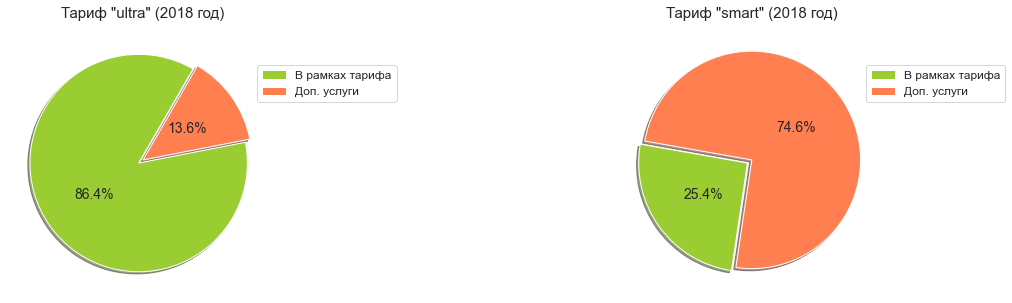

In [56]:
fig, axes = plt.subplots(1, 2, figsize=(20,10))
explode = (0.05, 0) 


df_filtered = df[df['tariff_name'] == 'smart'].groupby('over_category')['user_id']
ax = df_filtered.count().plot(kind='pie', fontsize=14, use_index=False, shadow=True, title='Тариф "smart" (2018 год)',\
            pctdistance=0.50, figsize=(20,5), startangle=170, ax=axes[1], explode=explode, autopct='%1.1f%%', \
            colors=['yellowgreen', 'coral'], labels=None)
ax.legend(['В рамках тарифа', 'Доп. услуги'], bbox_to_anchor=(0.897,0.87), prop={'size':12})
ax.set_ylabel('')
ax.title.set_size(15) 


df_filtered = df[df['tariff_name'] == 'ultra'].groupby('over_category')['user_id']
ax = df_filtered.count().plot(kind='pie', fontsize=14, use_index=False, shadow=True, title='Тариф "ultra" (2018 год)',\
            pctdistance=0.50, figsize=(20,5), startangle=60, ax=axes[0], explode=explode, autopct='%1.1f%%', \
            colors=['yellowgreen','coral'], labels=None)
ax.legend(['В рамках тарифа', 'Доп. услуги'], bbox_to_anchor=(0.897,0.87), prop={'size':12})
ax.set_ylabel('')
ax.title.set_size(15) 

В 74,6% случаев клиентам тарифа `"smart"` не хватает лимитов. Для тарифа `"ultra"` этот показатель значительно ниже - 13,6%.

Посмотрим на распределение данных по видам услуг и определим выбросы.

In [57]:
def plot_box():
    column_list = ['minut_used', 'messages_count', 'gb_used']
    title_list = ['Длительность звонков (мин.)', 'Количество сообщений (шт.)', 'Количество трафика (Гб)']
    rows = 1
    cols = 3
    column_list_counter = 0

    fig, axes = plt.subplots(rows, cols, figsize=(40,15))

    for r in range(rows):
        for c in range(cols):
            ax = sns.boxplot(x='tariff_name', y=column_list[column_list_counter], whis = 1.5, width=0.5, ax=axes[c],\
                             data=df, palette=['coral', 'yellowgreen'])
            ax.set_title(title_list[column_list_counter])
            ax.title.set_size(35)
            ax.tick_params(labelsize=25)
            ax.set_xlabel('Тариф', fontsize=25)
            ax.set_ylabel('')
            column_list_counter += 1


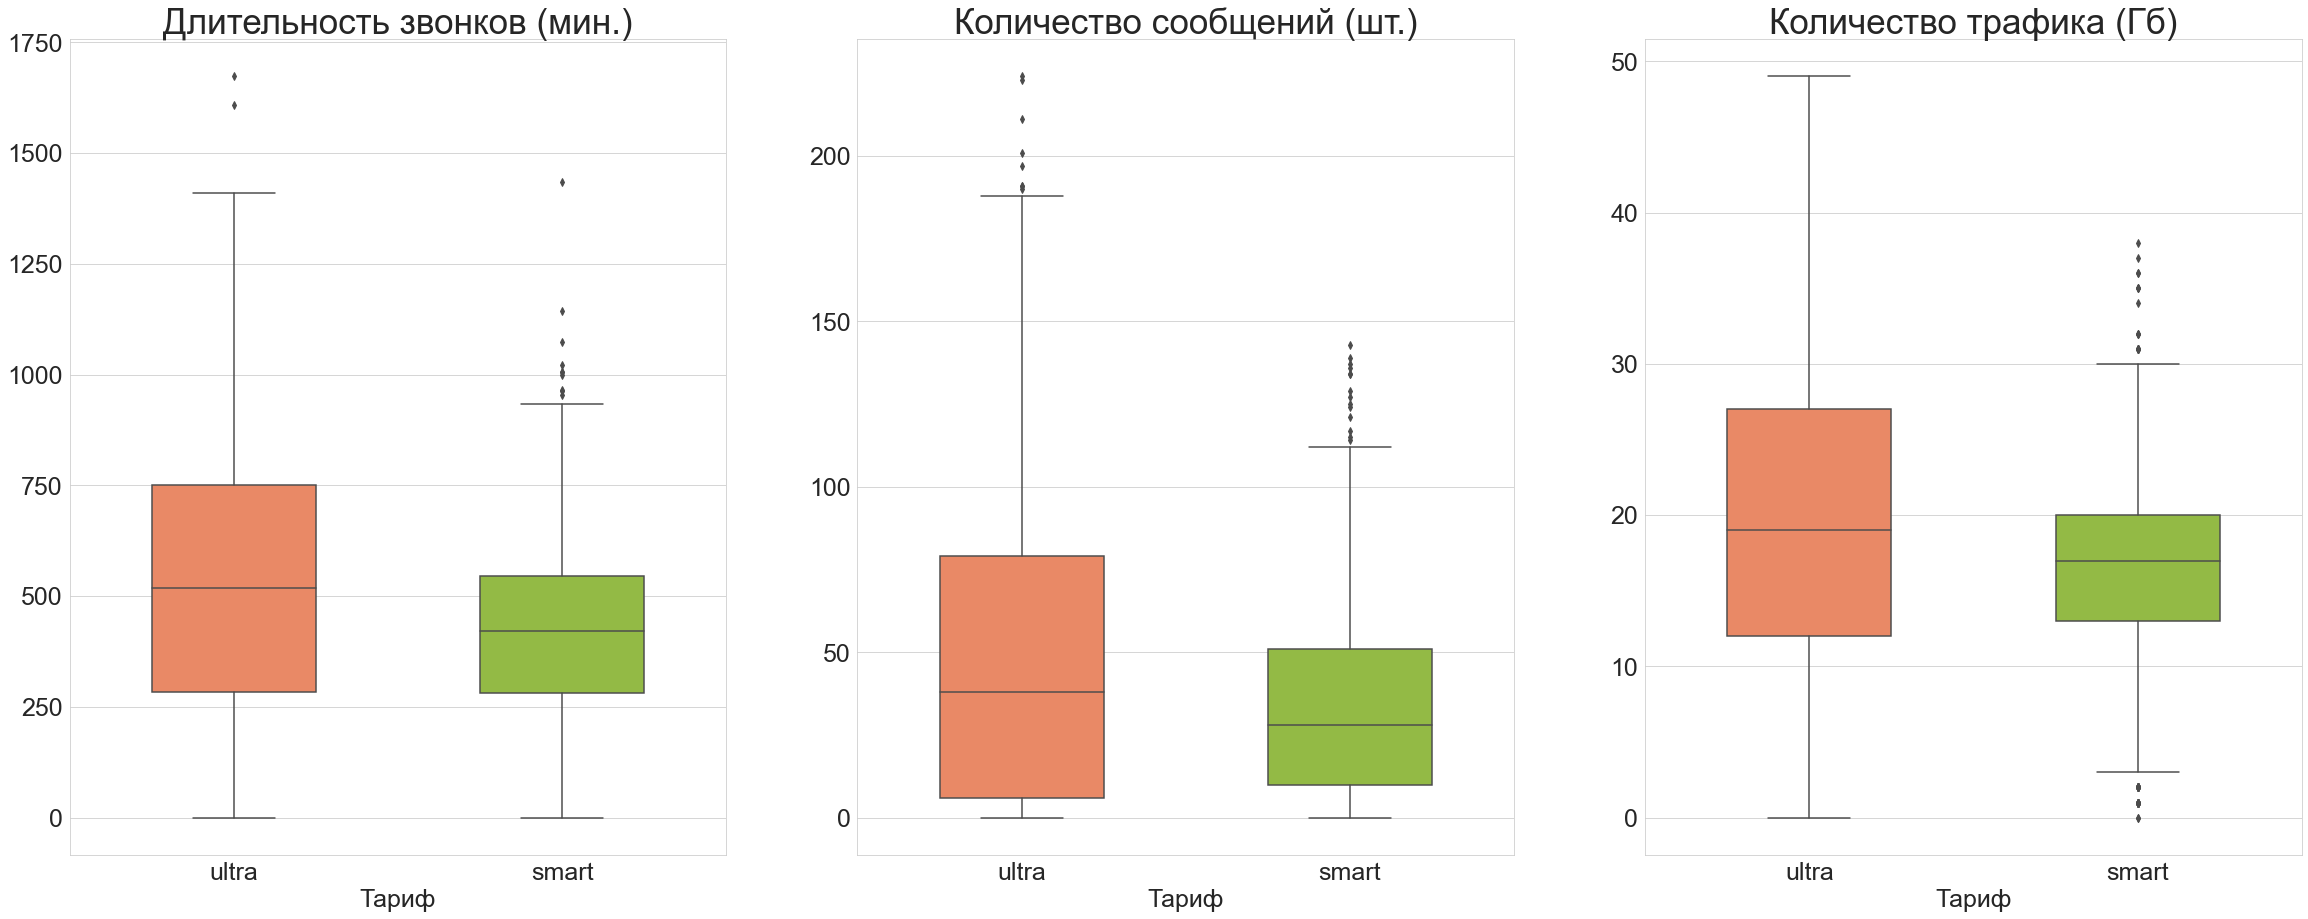

In [58]:
plot_box()

Создадим функцию для расчетов основных статистических метрик и интервалов данных без выбросов:

In [59]:
def interval(data):
    z = df.loc[df['tariff_name'] == 'ultra'][data]
    x_1 = np.quantile(z, 0.25) - (np.quantile(z, 0.75) - np.quantile(z, 0.25))*1.5
    y_1 = np.quantile(z, 0.75) + (np.quantile(z, 0.75) - np.quantile(z, 0.25))*1.5  
    x_1 = np.where(x_1 > 0, x_1, z.min())
    y_1 = np.where(y_1 > z.max(), y_1, z.max())
    
   
    z = df.loc[df['tariff_name'] == 'smart'][data]
    x_2 = np.quantile(z, 0.25) - (np.quantile(z, 0.75) - np.quantile(z, 0.25))*1.5
    y_2 = np.quantile(z, 0.75) + (np.quantile(z, 0.75) - np.quantile(z, 0.25))*1.5  
    x_2 = np.where(x_2 > 0, x_2, z.min())
    y_2 = np.where(y_2 > z.max(), y_2, z.max())

      
    df_group = df.groupby('tariff_name').agg(среднее_значение = (data, 'mean'),\
                                             дисперсия = (data, 'var'),\
                                             стандартное_отклонение = (data, 'std'))
    print('Интервал для столбца "{}" {}: {} - {}'.format(data, 'тарифа "smart"', x_2, y_2))
    print('Интервал для столбца "{}" {}: {} - {}'.format(data, 'тарифа "ultra"', x_1, y_1))
    display(df_group)
    

##### Интернет

In [60]:
interval('gb_used')

Интервал для столбца "gb_used" тарифа "smart": 2.5 - 38.0
Интервал для столбца "gb_used" тарифа "ultra": 0.0 - 49.5


,среднее_значение,дисперсия,стандартное_отклонение
tariff_name,,,
smart,16.328847,33.028705,5.747061
ultra,19.494416,97.091686,9.853511


Построим графики, учитывая новые граничные данные.

C:\Users\white\AppData\Local\Temp\ipykernel_12700\1295021470.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df.loc[(df['tariff_name'] == 'smart') & (df['gb_used'] <= 30.5) & (df['gb_used'] >= 2.5)]\
C:\Users\white\AppData\Local\Temp\ipykernel_12700\1295021470.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad63727

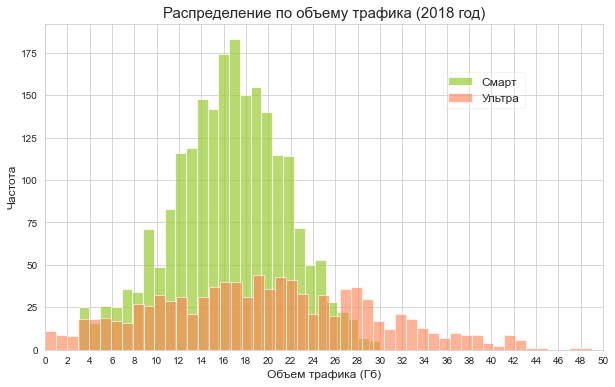

In [61]:
plt.figure(figsize=(10, 6))

ax = sns.distplot(df.loc[(df['tariff_name'] == 'smart') & (df['gb_used'] <= 30.5) & (df['gb_used'] >= 2.5)]\
                  ['gb_used'], bins=28, color='yellowgreen', kde=False, hist_kws={"alpha": 0.7})

ax = sns.distplot(df.loc[(df['tariff_name'] == 'ultra') & (df['gb_used'] <= 49.5)]['gb_used'],\
                  bins=50, color='coral', kde=False, hist_kws={"alpha": 0.6})

ax.legend(['Смарт', 'Ультра'], bbox_to_anchor=(0.87,0.87), framealpha=0.2, prop={'size':12})
ax.xaxis.set_major_locator(ticker.MultipleLocator(2))
plt.xlim(0, 50)
plt.xlabel('Объем трафика (Гб)', fontsize=12)
plt.ylabel('Частота', fontsize=12)
plt.title('Распределение по объему трафика (2018 год)', fontsize=15)

plt.show()

C:\Users\white\AppData\Local\Temp\ipykernel_12700\3319782947.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax_1 = sns.distplot(df.loc[(df['tariff_name'] == 'ultra') & (df['gb_used'] <= 49.5)]['gb_used'],\
C:\Users\white\AppData\Local\Temp\ipykernel_12700\3319782947.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


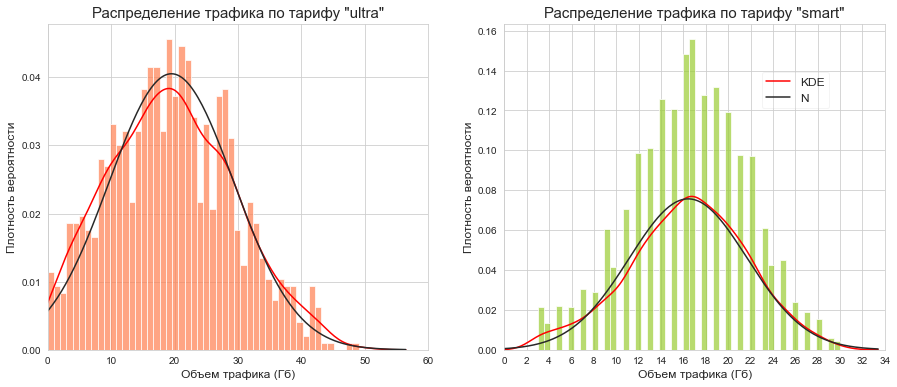

In [62]:
fig, axes = plt.subplots(1,2, figsize=(15,6))

ax_1 = sns.distplot(df.loc[(df['tariff_name'] == 'ultra') & (df['gb_used'] <= 49.5)]['gb_used'],\
                    kde_kws={"color": "r", 'label':'KDE'}, bins=50, color='coral', fit=sps.norm, \
                    hist_kws={"alpha": 0.7}, ax=axes[0])
ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
ax.legend(['KDE', 'N'], bbox_to_anchor=(0.87,0.87), framealpha=0.2, prop={'size':12})
axes[0].set_xlabel('Объем трафика (Гб)', fontsize=12)
axes[0].set_ylabel('Плотность вероятности', fontsize=12)
axes[0].set_title('Распределение трафика по тарифу "ultra"', fontsize=15)
axes[0].set_xlim(0, 60)

ax = sns.distplot(df.loc[(df['tariff_name'] == 'smart') & (df['gb_used'] <= 30.5) & (df['gb_used'] >= 2.5)]\
                    ['gb_used'],kde_kws={"color": "r", 'label':'KDE'}, bins=50, color='yellowgreen', \
                    fit=sps.norm, hist_kws={"alpha": 0.7}, ax=axes[1])
ax.legend(['KDE', 'N'], bbox_to_anchor=(0.87,0.87), framealpha=0.2, prop={'size':12})
ax.xaxis.set_major_locator(ticker.MultipleLocator(2))
axes[1].set_xlabel('Объем трафика (Гб)', fontsize=12)
axes[1].set_ylabel('Плотность вероятности', fontsize=12)
axes[1].set_title('Распределение трафика по тарифу "smart"', fontsize=15)
axes[1].set_xlim(0, 34)
plt.show()

Распределения близки к нормальному. 

Посмотрим на данные по сверхлимиту подробнее.

In [63]:
print("Всего интернета использовано:", df['gb_used'].sum(), "Гб")
print("т.ч. тариф 'smart': ", df[df['tariff_name'] == 'smart']['gb_used'].sum(), " Гб  ", \
      '{:.1%}'.format(df[df['tariff_name'] == 'smart']['gb_used'].sum()/df['gb_used'].sum()))
print("     среднее значение:", df.loc[(df['tariff_name'] == 'smart')]['gb_used'].mean())
print("т.ч. тариф 'ultra': ", df[df['tariff_name'] == 'ultra']['gb_used'].sum(), " Гб  ", \
      '{:.1%}'.format(df[df['tariff_name'] == 'ultra']['gb_used'].sum()/df['gb_used'].sum()))
print("     среднее значение:", df.loc[(df['tariff_name'] == 'ultra')]['gb_used'].mean())
print()
print("Всего интернета сверхлимита: ", df['gb_over'].sum(), "Гб")
print("т.ч. тариф 'smart': ", df[df['tariff_name'] == 'smart']['gb_over'].sum(), "  Гб  ", \
      '{:.1%}'.format(df[df['tariff_name'] == 'smart']['gb_over'].sum()/df['gb_over'].sum()))
print("     среднее значение:", df.loc[(df['tariff_name'] == 'smart')& (df['gb_over'] > 0)]['gb_over'].mean())
print("т.ч. тариф 'ultra': ", df[df['tariff_name'] == 'ultra']['gb_over'].sum(), "   Гб  ", \
      '{:.1%}'.format(df[df['tariff_name'] == 'ultra']['gb_over'].sum()/df['gb_over'].sum()))
print("     среднее значение:", df.loc[(df['tariff_name'] == 'ultra')& (df['gb_over'] > 0)]['gb_over'].mean())
print('\n')

Всего интернета использовано: 55599 Гб
т.ч. тариф 'smart':  36397  Гб   65.5%
     среднее значение: 16.328847016599372
т.ч. тариф 'ultra':  19202  Гб   34.5%
     среднее значение: 19.494416243654822

Всего интернета сверхлимита:  7451 Гб
т.ч. тариф 'smart':  6662   Гб   89.4%
     среднее значение: 5.108895705521473
т.ч. тариф 'ultra':  789    Гб   10.6%
     среднее значение: 5.888059701492537




C:\Users\white\AppData\Local\Temp\ipykernel_12700\928042337.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df.loc[(df['tariff_name'] == 'ultra') & (df['gb_over'] > 0)]['gb_over'], bins=40, \
C:\Users\white\AppData\Local\Temp\ipykernel_12700\928042337.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe575

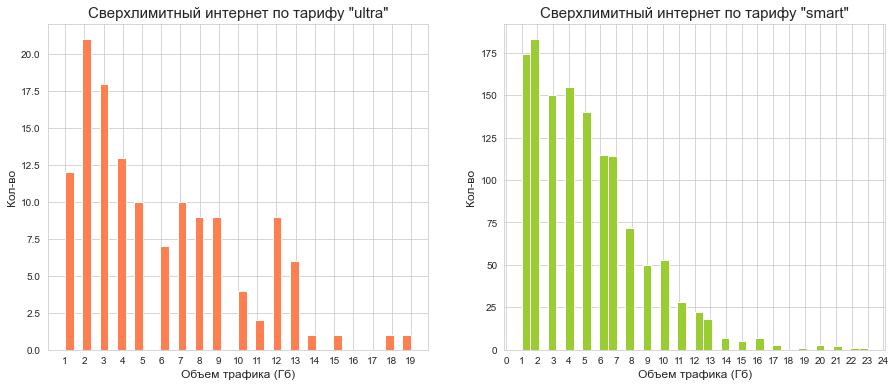

In [64]:
plt.figure(figsize=(15, 6))

plt.subplot(121)
ax = sns.distplot(df.loc[(df['tariff_name'] == 'ultra') & (df['gb_over'] > 0)]['gb_over'], bins=40, \
                  color='coral', kde=False, hist_kws={"alpha": 1})
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
plt.xlabel('Объем трафика (Гб)', fontsize=12)
plt.ylabel('Кол-во', fontsize=12)
plt.title('Сверхлимитный интернет по тарифу "ultra"', fontsize=15)

plt.subplot(122)
ax = sns.distplot(df.loc[(df['tariff_name'] == 'smart') & (df['gb_over'] > 0)]['gb_over'],bins=40, \
                  color='yellowgreen', kde=False, hist_kws={"alpha": 1})
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
plt.xlabel('Объем трафика (Гб)', fontsize=12)
plt.ylabel('Кол-во', fontsize=12)
plt.title('Сверхлимитный интернет по тарифу "smart"', fontsize=15)

plt.show()

Клиенты тарифов `"ultra"` и `"smart"` чаще всего дозаказывают по 2 Гб, среднее значение - 6 Гб.

##### Сообщения

In [65]:
interval('messages_count')

Интервал для столбца "messages_count" тарифа "smart": 0.0 - 143.0
Интервал для столбца "messages_count" тарифа "ultra": 0.0 - 224.0


,среднее_значение,дисперсия,стандартное_отклонение
tariff_name,,,
smart,33.384029,796.812958,28.227876
ultra,49.363452,2285.266143,47.804457


Построим графики, учитывая новые граничные данные.

C:\Users\white\AppData\Local\Temp\ipykernel_12700\2356303981.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df.loc[(df['tariff_name'] == 'smart') & (df['messages_count'] <= 112.5)] \
C:\Users\white\AppData\Local\Temp\ipykernel_12700\2356303981.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax 

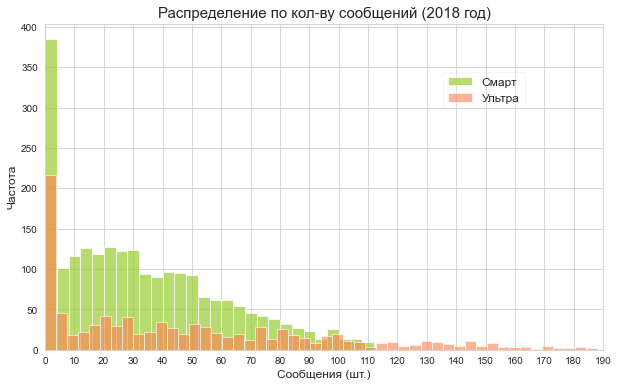

In [66]:
plt.figure(figsize=(10, 6))

ax = sns.distplot(df.loc[(df['tariff_name'] == 'smart') & (df['messages_count'] <= 112.5)] \
                  ['messages_count'], bins=28, color='yellowgreen', kde=False, hist_kws={"alpha": 0.7})

ax = sns.distplot(df.loc[(df['tariff_name'] == 'ultra') & (df['messages_count'] <= 188.5)]['messages_count'],\
                  bins=50, color='coral', kde=False, hist_kws={"alpha": 0.6})

ax.legend(['Смарт', 'Ультра'], bbox_to_anchor=(0.87,0.87), framealpha=0.2, prop={'size':12})
ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
plt.xlim(0, 190)
plt.xlabel('Сообщения (шт.)', fontsize=12)
plt.ylabel('Частота', fontsize=12)
plt.title('Распределение по кол-ву сообщений (2018 год)', fontsize=15)

plt.show()

C:\Users\white\AppData\Local\Temp\ipykernel_12700\3057166387.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df.loc[(df['tariff_name'] == 'ultra') & (df['messages_count'] <= 112.5)]['messages_count'],\
C:\Users\white\AppData\Local\Temp\ipykernel_12700\3057166387.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad63

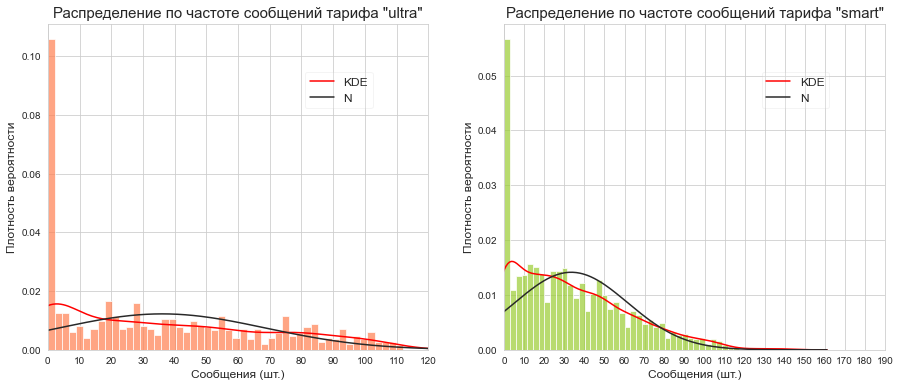

In [67]:
plt.figure(figsize=(15, 6))

plt.subplot(121)
ax = sns.distplot(df.loc[(df['tariff_name'] == 'ultra') & (df['messages_count'] <= 112.5)]['messages_count'],\
                    kde_kws={"color": "r", 'label':'KDE'}, bins=50, color='coral', \
                    fit=sps.norm, hist_kws={"alpha": 0.7})
ax.legend(['KDE', 'N'], bbox_to_anchor=(0.87,0.87), framealpha=0.2, prop={'size':12})
ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
plt.xlabel('Сообщения (шт.)', fontsize=12)
plt.ylabel('Плотность вероятности', fontsize=12)
plt.title('Распределение по частоте сообщений тарифа "ultra"', fontsize=15)
plt.xlim(0, 120)

plt.subplot(122)
ax = sns.distplot(df.loc[(df['tariff_name'] == 'smart') & (df['messages_count'] <= 188.5)]['messages_count'],\
                    kde_kws={"color": "r", 'label':'KDE'}, bins=50, color='yellowgreen',\
                    fit=sps.norm, hist_kws={"alpha": 0.7})
ax.legend(['KDE', 'N'], bbox_to_anchor=(0.87,0.87), framealpha=0.2, prop={'size':12})
ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
plt.xlabel('Сообщения (шт.)', fontsize=12)
plt.ylabel('Плотность вероятности', fontsize=12)
plt.title('Распределение по частоте сообщений тарифа "smart"', fontsize=15)
plt.xlim(0, 190)
plt.show()

Распределения близки к распределение Пуассона.

Посмотрим на данные по сверхлимиту подробнее.

In [68]:
    print("Всего сообщений:             ", df['messages_count'].sum(), "шт.")
    print("т.ч. тариф 'smart': ", df[df['tariff_name'] == 'smart']['messages_count'].sum(), " шт. ",\
          '{:.1%}'.format(df[df['tariff_name'] == 'smart']['messages_count'].sum()/df['messages_count'].sum()))
    print("     среднее значение:", df.loc[(df['tariff_name'] == 'smart')]['messages_count'].mean())
    print("т.ч. тариф 'ultra': ", df[df['tariff_name'] == 'ultra']['messages_count'].sum(), " шт. ",\
          '{:.1%}'.format(df[df['tariff_name'] == 'ultra']['messages_count'].sum()/df['messages_count'].sum()))
    print("     среднее значение:", df.loc[(df['tariff_name'] == 'ultra')]['messages_count'].mean())
    print()
    print("Всего сообщений сверхлимита: ", df['messages_over'].sum(), "шт.")
    print("т.ч. тариф 'smart': ", df[df['tariff_name'] == 'smart']['messages_over'].sum(), " шт. ", \
          '{:.1%}'.format(df[df['tariff_name'] == 'smart']['messages_over'].sum()/df['messages_over'].sum()))
    print("     среднее значение:", df.loc[(df['tariff_name'] == 'smart')]['messages_over'].mean())
    print("т.ч. тариф 'ultra': ", df[(df['tariff_name'] == 'ultra') & (df['messages_over'] > 0)]\
          ['messages_over'].sum(), "     шт. ", \
          '{:.1%}'.format(df[df['tariff_name'] == 'ultra']['messages_over'].sum()/df['messages_over'].sum()))
    print('\n')

Всего сообщений:              123036 шт.
т.ч. тариф 'smart':  74413  шт.  60.5%
     среднее значение: 33.384028712427096
т.ч. тариф 'ultra':  48623  шт.  39.5%
     среднее значение: 49.36345177664975

Всего сообщений сверхлимита:  12928 шт.
т.ч. тариф 'smart':  12928  шт.  100.0%
     среднее значение: 5.799910273665321
т.ч. тариф 'ultra':  0      шт.  0.0%




C:\Users\white\AppData\Local\Temp\ipykernel_12700\322076834.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df.loc[(df['tariff_name'] == 'smart') & (df['messages_over'] > 0)]['messages_over'], bins=100, \


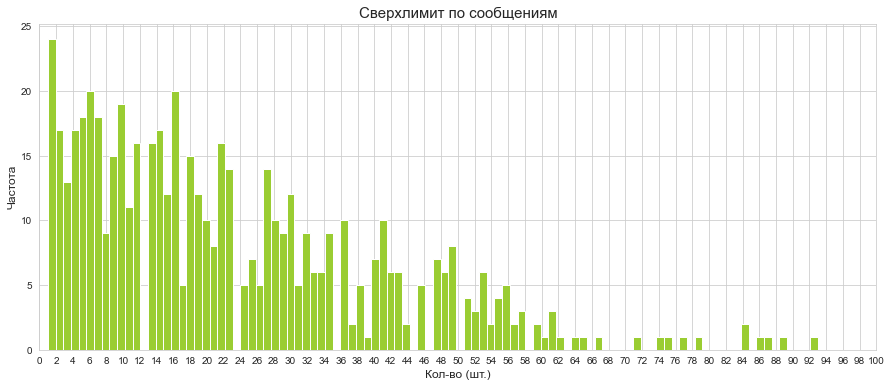

In [69]:
plt.figure(figsize=(15, 6))

ax = sns.distplot(df.loc[(df['tariff_name'] == 'smart') & (df['messages_over'] > 0)]['messages_over'], bins=100, \
                  color='yellowgreen', kde=False, hist_kws={"alpha": 1})
ax.xaxis.set_major_locator(ticker.MultipleLocator(2))
plt.xlabel('Кол-во (шт.)', fontsize=12)
plt.ylabel('Частота', fontsize=12)
plt.title('Сверхлимит по сообщениям', fontsize=15)
plt.xlim(0, 100)
plt.show()

Весь сверхлимит по сообщениям приходится на тариф `"smart"`. Самый распространенный сверхлимит - 1 сообщение, среднее значение - 6 сообщений.

In [70]:
print("ТОП 5:")
df.loc[df['messages_over'] != 0]['messages_over'].value_counts().head()

ТОП 5:


1     24
6     20
16    20
10    19
5     18
Name: messages_over, dtype: int64

##### Звонки

In [71]:
interval('minut_used')

Интервал для столбца "minut_used" тарифа "smart": 0.0 - 1435.0
Интервал для столбца "minut_used" тарифа "ultra": 0.0 - 1673.0


,среднее_значение,дисперсия,стандартное_отклонение
tariff_name,,,
smart,417.934948,36219.315784,190.313730
ultra,526.623350,100873.633397,317.606098


Построим графики, учитывая новые граничные данные.

C:\Users\white\AppData\Local\Temp\ipykernel_12700\2818454768.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df.loc[(df['tariff_name'] == 'smart') & (df['minut_used'] <= 939.5)] \
C:\Users\white\AppData\Local\Temp\ipykernel_12700\2818454768.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sn

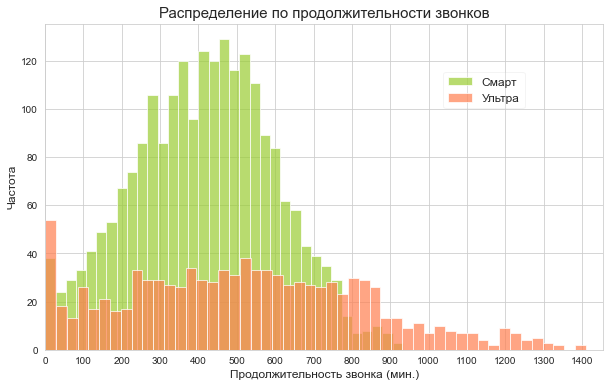

In [72]:
plt.figure(figsize=(10, 6))

ax = sns.distplot(df.loc[(df['tariff_name'] == 'smart') & (df['minut_used'] <= 939.5)] \
                  ['minut_used'], bins=35, color='yellowgreen', kde=False, hist_kws={"alpha": 0.7})

ax = sns.distplot(df.loc[(df['tariff_name'] == 'ultra') & (df['minut_used'] <= 1454)]\
                  ['minut_used'], bins=50, color='coral', kde=False, hist_kws={"alpha": 0.7})

ax.legend(['Смарт', 'Ультра'], bbox_to_anchor=(0.87,0.87), framealpha=0.2, prop={'size':12})
ax.xaxis.set_major_locator(ticker.MultipleLocator(100))
plt.xlim(0, 1455)
plt.xlabel('Продолжительность звонка (мин.)', fontsize=12)
plt.ylabel('Частота', fontsize=12)
plt.title('Распределение по продолжительности звонков', fontsize=15)

plt.show()

C:\Users\white\AppData\Local\Temp\ipykernel_12700\842412390.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df.loc[(df['tariff_name'] == 'ultra') & (df['minut_used'] <= 1454.0)]['minut_used'],\
C:\Users\white\AppData\Local\Temp\ipykernel_12700\842412390.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5

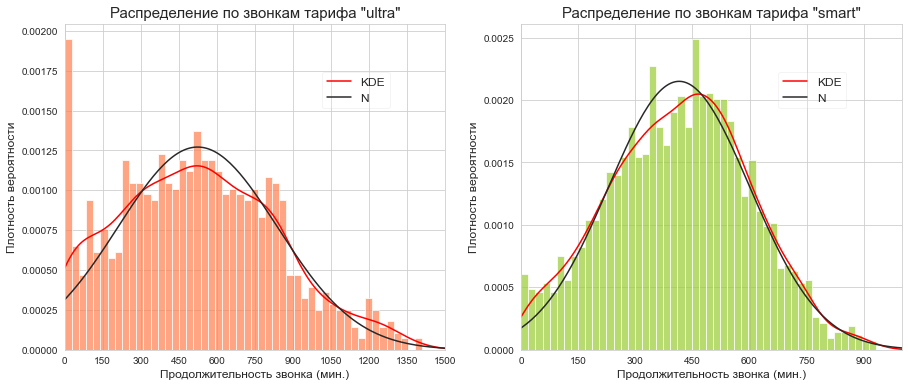

In [73]:
plt.figure(figsize=(15, 6))

plt.subplot(121)
ax = sns.distplot(df.loc[(df['tariff_name'] == 'ultra') & (df['minut_used'] <= 1454.0)]['minut_used'],\
                    kde_kws={"color": "r", 'label':'KDE'}, bins=50, color='coral',\
                    fit=sps.norm, hist_kws={"alpha": 0.7})
ax.legend(['KDE', 'N'], bbox_to_anchor=(0.87,0.87), framealpha=0.2, prop={'size':12})
ax.xaxis.set_major_locator(ticker.MultipleLocator(150))
plt.xlabel('Продолжительность звонка (мин.)', fontsize=12)
plt.ylabel('Плотность вероятности', fontsize=12)
plt.title('Распределение по звонкам тарифа "ultra"', fontsize=15)
plt.xlim(0, 1500)

plt.subplot(122)
ax = sns.distplot(df.loc[(df['tariff_name'] == 'smart') & (df['minut_used'] <= 939.5)]['minut_used'], \
                   kde_kws={"color": "r", 'label':'KDE'}, bins=50, color='yellowgreen',\
                   fit=sps.norm, hist_kws={"alpha": 0.7})
ax.legend(['KDE', 'N'], bbox_to_anchor=(0.87,0.87), framealpha=0.2, prop={'size':12})
ax.xaxis.set_major_locator(ticker.MultipleLocator(150))
plt.xlabel('Продолжительность звонка (мин.)', fontsize=12)
plt.ylabel('Плотность вероятности', fontsize=12)
plt.title('Распределение по звонкам тарифа "smart"', fontsize=15)
plt.xlim(0, 1000)
plt.show()

Распределения близки к нормальному. 

Посмотрим на данные по сверхлимиту подробнее.

In [74]:
    print("Всего звонков:               ", df['minut_used'].sum(), "мин.")
    print("т.ч. тариф 'smart': ", df[df['tariff_name'] == 'smart']['minut_used'].sum(), "мин.", \
          '{:.1%}'.format(df[df['tariff_name'] == 'smart']['minut_used'].sum()/df['minut_used'].sum()))
    print("     среднее значение:", df.loc[(df['tariff_name'] == 'smart') & (df['minut_used'] > 0)]\
          ['minut_used'].mean())
    print("т.ч. тариф 'ultra': ", df[df['tariff_name'] == 'ultra']['minut_used'].sum(), "мин.", \
          '{:.1%}'.format(df[df['tariff_name'] == 'ultra']['minut_used'].sum()/df['minut_used'].sum()))
    print("     среднее значение:", df.loc[(df['tariff_name'] == 'ultra') & (df['minut_used'] > 0)]\
          ['minut_used'].mean())
    print()
    print("Всего минут сверхлимита:     ", df['minutes_over'].sum(), "мин.")
    print("т.ч. тариф 'smart': ", df[df['tariff_name'] == 'smart']['minutes_over'].sum(), " мин.", \
          '{:.1%}'.format(df[df['tariff_name'] == 'smart']['minutes_over'].sum()/df['minutes_over'].sum()))
    print("     среднее значение:", df.loc[(df['tariff_name'] == 'smart') & (df['minutes_over'] > 0)]\
          ['minutes_over'].mean())
    print("т.ч. тариф 'ultra': ", df[df['tariff_name'] == 'ultra']['minutes_over'].sum(), "     мин.", \
          '{:.1%}'.format(df[df['tariff_name'] == 'ultra']['minutes_over'].sum()/df['minutes_over'].sum()))  
        

Всего звонков:                1450301 мин.
т.ч. тариф 'smart':  931577 мин. 64.2%
     среднее значение: 419.4403421882035
т.ч. тариф 'ultra':  518724 мин. 35.8%
     среднее значение: 547.7550158394931

Всего минут сверхлимита:      92739 мин.
т.ч. тариф 'smart':  92739  мин. 100.0%
     среднее значение: 122.99602122015915
т.ч. тариф 'ultra':  0      мин. 0.0%


C:\Users\white\AppData\Local\Temp\ipykernel_12700\2234684535.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df.loc[(df['tariff_name'] == 'smart') & (df['minutes_over'] > 0)]['minutes_over'], \


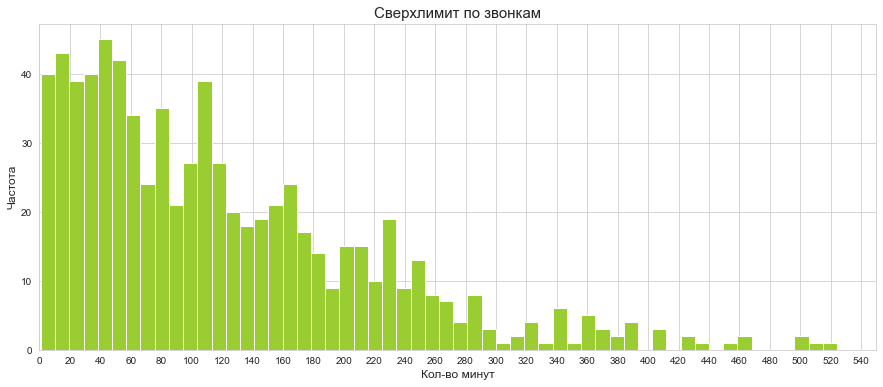

In [75]:
plt.figure(figsize=(15, 6))
ax = sns.distplot(df.loc[(df['tariff_name'] == 'smart') & (df['minutes_over'] > 0)]['minutes_over'], \
                  bins=100, color='yellowgreen', kde=False, hist_kws={"alpha": 1})
ax.xaxis.set_major_locator(ticker.MultipleLocator(20))
plt.xlabel('Кол-во минут', fontsize=12)
plt.ylabel('Частота', fontsize=12)
plt.title('Сверхлимит по звонкам', fontsize=15)
plt.xlim(0, 550)

plt.show()

Весь сверхлимит по сообщениям приходится на тариф `"smart"`. Самый распространенный сверхлимит - 32 минуты, среднее значение - 123.

In [76]:
print("ТОП 5:")
df.loc[df['minutes_over'] != 0]['minutes_over'].value_counts().head()

ТОП 5:


32     9
106    7
16     7
41     7
54     7
Name: minutes_over, dtype: int64

**Вывод**

- Выручка   
   - Общая выручка за 2018 год составила 4 914 451 руб.: 58.5% по тарифу `"smart"` и 41.5% по тарифу `"ultra"`.
   - Сверхлимитная выручка 1 767 751 руб.: 93.3% по тарифу `"smart"` и 6.7% по тарифу `"ultra"`.
    
- Интернет   
   - Всего интернета использовано за 2018 год 55 599 Гб: 65.5% по тарифу `"smart"` и 34.5% по тарифу `"ultra"`.
   - Интернета сверхлимита 7 451 Гб: 89.4% по тарифу `"smart"` и 10.6% по тарифу `"ultra"`.
   - Распределения по тарифам близки к нормальному.
   
- Сообщения   
   - Всего сообщений за 2018 год 123 036 шт.: 60.5% по тарифу `"smart"` и 39.5% по тарифу `"ultra"`.
   - Сообщений сверхлимита 12 928 шт.: 100% по тарифу `"smart"`.
   - Распределения по тарифам искажены из-за значительной доли пользователей, непользующихся услугой.

- Звонки   
   - Всего минут за 2018 год 1 450 301 мин.: 64,2% по тарифу `"smart"` и 35,8% по тарифу `"ultra"`. 
   - Минут сверхлимита 92 739 мин.: 100% по тарифу `"smart"`.
   - Распределения по тарифам близки к нормальному.  

### Шаг 3. Проверка гипотез

#### Гипотеза 1: различие средней выручки пользователей тарифов «ultra» и «smart»

 - **$H_0$** (нулевая гипотеза): средние выручки пользователей тарифов `«ultra»` и `«smart»` равны.
 - **$H_1$** (альтернативная гипотеза): средние выручки пользователей тарифов `«ultra»` и `«smart»` различаются.

Посмотрим на распределение данных и найдем интервал без выбросов с помощью ранее созданной функции.

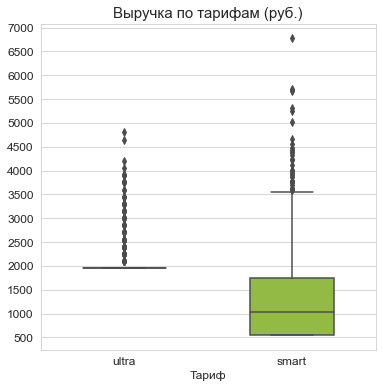

In [77]:
plt.figure(figsize=(6, 6))
ax = sns.boxplot(x='tariff_name', y='revenue', whis = 1.5, width=0.5, data=df, palette=['coral', 'yellowgreen'])
ax.set_title('Выручка по тарифам (руб.)')
ax.set_xlabel('Тариф', fontsize=12)
ax.set_ylabel('')
ax.yaxis.set_major_locator(ticker.MultipleLocator(500))
ax.title.set_size(15)
ax.tick_params(labelsize=12)

In [78]:
interval('revenue')

Интервал для столбца "revenue" тарифа "smart": 550.0 - 6770.0
Интервал для столбца "revenue" тарифа "ultra": 1950.0 - 4800.0


,среднее_значение,дисперсия,стандартное_отклонение
tariff_name,,,
smart,1289.973531,669785.708006,818.404367
ultra,2070.152284,141516.745079,376.187114


Рассмотрим три аспекта, чтобы понять, можно ли применять t-тест:
 
 - Генеральные совокупности не должны зависеть друг от друга.
        Данные позволяют говорить о независимости двух совокупностей.
 - Выборочные средние должны быть нормально распределены.
        Согласно ЦПТ, если размер выборки составляет хотя бы несколько десятков значений, выборочные средние будут распределены нормально вокруг истинного среднего этой совокупности. Кол-во данных по тарифам достаточно. 
        
 - Дисперсии рассматриваемых генеральных совокупностей должны быть равны.
        Мы не знаем, равны ли дисперсии рассматриваемых генеральных совокупностей.
        Установим параметр equal_var в значение False.

Критический уровень статистической значимости установим на уровне 0.05.

In [79]:
sample_1 = df.loc[(df['tariff_name'] == 'ultra') & (df['revenue'] == 1950.0)]['revenue']
sample_2 = df.loc[(df['tariff_name'] == 'smart') & (df['revenue'] >= 550) & (df['revenue'] <= 3550)]['revenue']
alpha = 0.05
results = st.ttest_ind(sample_1, sample_2)
print('p-значение: ', '{:.5e}'.format(results.pvalue))
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  6.19933e-155
Отвергаем нулевую гипотезу


**Вывод**: средняя выручка по тарифам `"ultra"` и `"smart"` отличается.

In [80]:
print("Средняя выручка по пользователям тарифа smart -", '{:.2f}'.format(sample_2.mean()),"руб.")
print("Средняя выручка по пользователям тарифа ultra -", '{:.2f}'.format(sample_1.mean()),"руб.")

Средняя выручка по пользователям тарифа smart - 1246.16 руб.
Средняя выручка по пользователям тарифа ultra - 1950.00 руб.


Действительно, средняя выручка по тарифу `'ultra'` больше на 56,48%.

#### Гипотеза 2: различие средней выручки пользователей Москвы и других регионов.

 - **H₀** (нулевая гипотеза): средние выручки пользователей из Москвы и других регионов равны.
 - **H₁** (альтернативная гипотеза): средние выручки пользователей из Москвы и других регионов различаются.

Посмотрим на распределение данных и найдем интервал без выбросов. 

Для этого добавим в данные новый столбец с категорией: 1 - Москва, 0 - Прочие города.

In [81]:
df['city_category'] = np.where(df['city'] == 'Москва', 1, 0)

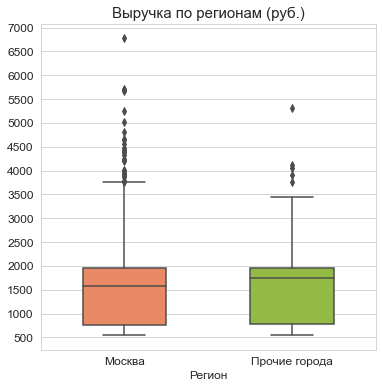

In [82]:
plt.figure(figsize=(6, 6))
ax = sns.boxplot(x='city_category', y='revenue', whis = 1.5, width=0.5, data=df, palette=['coral', 'yellowgreen'])
ax.set_title('Выручка по регионам (руб.)')
ax.set_xlabel('Регион', fontsize=12)
ax.set_ylabel('')
ax.set_xticklabels(['Москва','Прочие города'])
ax.yaxis.set_major_locator(ticker.MultipleLocator(500))
ax.title.set_size(15)
ax.tick_params(labelsize=12)

In [83]:
z = df.loc[df['city_category'] == 1]['revenue']

x_1 = np.quantile(z, 0.25) - (np.quantile(z, 0.75) - np.quantile(z, 0.25))*1.5
y_1 = np.quantile(z, 0.75) + (np.quantile(z, 0.75) - np.quantile(z, 0.25))*1.5  
x_1 = np.where(x_1 > 0, x_1, z.min())
y_1 = np.where(y_1 > z.max(), y_1, z.max())
    

z = df.loc[df['city_category'] == 0]['revenue']
x_2 = np.quantile(z, 0.25) - ((np.quantile(z, 0.75) - np.quantile(z, 0.25))*1.5)
y_2 = np.quantile(z, 0.75) + ((np.quantile(z, 0.75) - np.quantile(z, 0.25))*1.5)  
x_2 = np.where(x_2 > 0, x_2, z.min())
y_2 = np.where(y_2 > z.max(), y_2, z.max())

print('Интервал для столбца "{}" {}: {} - {}'.format('revenue', 'по пользователям из Москвы', x_1, y_1))
print('Интервал для столбца "{}" {}: {} - {}'.format('revenue', 'по пользователям из прочих городов', x_2, y_2))

Интервал для столбца "revenue" по пользователям из Москвы: 550.0 - 5321.0
Интервал для столбца "revenue" по пользователям из прочих городов: 550.0 - 6770.0


Рассмотрим три аспекта, чтобы понять, можно ли применять t-тест:
 
 - Генеральные совокупности не должны зависеть друг от друга.
        Данные позволяют говорить о независимости двух совокупностей.
 - Выборочные средние должны быть нормально распределены.
        Согласно ЦПТ, если размер выборки составляет хотя бы несколько десятков значений, выборочные средние будут распределены нормально вокруг истинного среднего этой совокупности. Кол-во данных по городам достаточно. 
        
 - Дисперсии рассматриваемых генеральных совокупностей должны быть равны.
        Мы не знаем, равны ли дисперсии рассматриваемых генеральных совокупностей.
        Установим параметр equal_var в значение False.

Критический уровень статистической значимости установим на уровне 0.05.

In [84]:
sample_1 = df.loc[(df['city_category'] == 1) & (df['revenue'] >= 550) & (df['revenue'] <= 3704.25)]['revenue']
sample_2 = df.loc[(df['city_category'] == 0) & (df['revenue'] >= 550) & (df['revenue'] <= 3750)]['revenue']
alpha = 0.05
results = st.ttest_ind(sample_1, sample_2)
print('p-значение: ', '{:.5f}'.format(results.pvalue))
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  0.29404
Не получилось отвергнуть нулевую гипотезу


**Вывод**: средние выручки пользователей из Москвы и других регионов равны.

In [85]:
print("Средняя выручка по пользователям из Москвы", '{:.2f}'.format(sample_1.mean()),"руб.")
print("Средняя выручка по пользователям из других городов", '{:.2f}'.format(sample_2.mean()),"руб.")

Средняя выручка по пользователям из Москвы 1524.60 руб.
Средняя выручка по пользователям из других городов 1489.67 руб.


Средняя выручка в Москве больше на 2,3%.

**Вывод**

Рабочими признаны следующие гипотезы:    
- средние выручки пользователей тарифов `«ultra»` и `«smart»` различаются.
- средние выручки пользователей из Москвы и других регионов равны.    

### Шаг 4. Общий вывод

Обобщим полученную по тарифам информацию.

**Тариф "smart"**

    350 пользователей, 70,3%
    Доля пользователей, отказавшихся от использования тарифа в 2018 году: 6.55%

    Ежемесячная плата: 550 рублей
        
    Выручка за 2018 год: 2 875 351 руб., 58,5%
        в т.ч. сверхлимит: 1 649 401 руб.
        среднее значение выручки: 1289.97 руб.
        среднее значение сверхлимитной выручки: 992.42 руб.
    
    Интернет:
        среднее значение: 17 Гб.
        включено в тариф: 15 Гб.
        дозаказ интернета в среднем: 6 Гб.
        
    Сообщения:
        среднее значение: 34 шт.
        включено в тариф: 50 шт.
        дозаказ сообщений в среднем: 6 шт.
        
    Минуты:
        среднее значение: 420 мин.
        включено в тариф: 500 мин.
        дозаказ минут в среднем: 123 мин.

**Тариф "ultra"**

    148 пользователей, 29,7%
    Доля пользователей, отказавшихся от использования тарифа в 2018 году: 10.07%
    
    Ежемесячная плата: 1950 рублей
        
    Выручка за 2018 год: 2 039 100 руб., 41,5%
        в т.ч. сверхлимит: 118 350 руб.
        среднее значение выручки: 2070.15 руб.
        среднее значение сверхлимитной выручки: 883.21 руб.
        
    Интернет:
        среднее значение: 20 Гб.
        включено в тариф: 30 Гб.
        дозаказ интернета в среднем: 6 Гб.

    Сообщения:
        среднее значение: 50 шт.
        включено в тариф: 1000 шт.
        дозаказ сообщений в среднем: 0 шт.
        
    Минуты:
        среднее значение: 548 мин.
        включено в тариф: 3000 мин.
        дозаказ минут в среднем: 0 мин.       


Вклад обоих тарифов в выручку компании значителен: 58,5% для `"smart"` и 41,5% для тарифа `"ultra"`.
Выручка тарифа `"smart"` формируется в значительной мере за счет кол-ва пользователей и кол-ва сверхлимитных услуг. Выручка тарифа `"ultra"` формируется в значительной мере за счет высокой абонентской платы.

Мне кажется, что наиболее перспективное направление - изменение тарифа `"smart"` с целью перевода части клиентов в сегмент более высокой абоненской платы. Для этого можно создать конструктор тарифа, предложив клиентам возможность расширения лимитов по интернету, минутам/сообщениям за счет увеличения абоненской платы. 